## PART D.  Develop a Baseline Neural Network Model
### Normalized Data
#### Predicting Concrete Strength
3 Hidden layers of 10 nodes, activation f: RelU, optimizer: adam and  
loss: MSE. Train 50 epochs, 50 Iterations for MSE

##### Import functions required and the Keras objects library

In [4]:
import pandas as pd
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib import pyplot

print ("Ready, Set, Go!!!!!!!")

Ready, Set, Go!!!!!!!


 ### Build the neural network

##### Import Data - preprocess

In [5]:
concrete_data = pd.read_csv('https://cocl.us/concrete_data')
concrete_data.tail(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.4


In [6]:
concrete_data.isnull().sum(); #Check for null values

##### Define predictors and target

In [7]:
concrete_data_columns = concrete_data.columns
#SET TARGET VARIABLE - STRENGTH
target = concrete_data['Strength']
#SET PREDICTORS TO BE ALL OTHER COLUMNS
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]

##### Check data size

In [8]:
#TARGET - STRENGTH COLUMN
shape = concrete_data.shape
print('\nNumber of samples/rows :', shape[0])
target.tail(1)


Number of samples/rows : 1030


1029    32.4
Name: Strength, dtype: float64

#### Define Target and Predictors

#### Normalize data by substracting the mean and dividing by the standard deviation.

In [9]:
#NORMALIZE TARGET and PREDICTORS
target_norm = (target - target.mean()) / target.std()
predictors_norm = (predictors - predictors.mean()) / predictors.std()
#predictors_norm.head() #check
target_norm.tail(2) #check

1028   -0.182450
1029   -0.204598
Name: Strength, dtype: float64

In [10]:
cols = predictors_norm.shape[1]
predictors_norm.tail(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1029,-0.193939,0.308349,0.376762,0.891286,0.400971,-1.394385,-0.150675,-0.279597


#### Develop Baseline Regression Model

In [11]:
#SET  VARIABLES FOR THE BASELINE MODEL
nodes = 10
output = 1

# define base regression model
def regression_model(nodes):
    # create model
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_shape=(cols,))) #3 hidden layers , 10 nodes, relu activation
    model.add(Dense(nodes, activation='relu', input_shape=(cols,))) 
    model.add(Dense(nodes, activation='relu', input_shape=(cols,))) 
    model.add(Dense(output)) #Output Layer
        # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Split Train/Test Data - Step 1

In [12]:
#SET SEED A FIXED VALUE FOR REPRODUCITY
import numpy
seed = 7
numpy.random.seed(seed)

# Split Train/Test Data
X = predictors_norm
y = target_norm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
train_test_split(y, shuffle=True);

## Train and Evaluate Model - Steps 2,3 and
## Iterations - Step 4

#### Define and compile baseline regression model

In [13]:
nodes = 10
output = 1

# define base regression model
def regression_model(nodes):
    # create model
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_shape=(cols,))) #1 hidden layer , 10 nodes, relu activation
    model.add(Dense(nodes, activation='relu', input_shape=(cols,)))
    model.add(Dense(nodes, activation='relu', input_shape=(cols,)))
    model.add(Dense(output)) #Output Layer
        # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#### Initialize the Model, Split Train/Test Data, Train Model, Evaluate and List MSE

In [14]:
#USED TO MONITOR OUTPUT IN A SINGLE LINE - CLOEAR AND OVERWRITE
from IPython.display import display, clear_output

#SET VARIABLES FOR THE ASSIGNMENTS THAT WILL CHANGE IN ASSIGNMENTS
epochs = 50
b = 32
Dlist = []

#SET SEED A FIXED VALUE FOR REPRODUCITY
import numpy
seed = 7
numpy.random.seed(seed)

#SET THE PROGRESS COUNTDOWN n
n = 0
iterations = 50
i = 0

# HERE WE GO!
for i in range(iterations):
    
    #To monitor will set up a countER
    clear_output(wait=True)            # Print and "overwrite" all print statements sequentially
    n = i + 1                          # Counter less the index for report
    print("Iteration {} ".format(n) + "..... Training is in progress.")
        
#Initialize the model
    model = regression_model(nodes)

# Split Train/Test Data
    X = predictors_norm
    y = target_norm
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
    train_test_split(y, shuffle=True)

# Train / fit the model
    model.fit(X, y, validation_split=0.3, epochs=epochs, batch_size=b, verbose=0, shuffle=True)
    prediction = model.predict(X)
    prediction
        
# Calculate MSE of EACH iteration
    mse = mean_squared_error(target_norm,prediction)

# Create a list of MSE's, add each one to a list
    Dlist.append(mse)
    
result = np.array(Dlist)
print ("Training is complete for {} iterations! ".format(n))
result  

Iteration 50 ..... Training is in progress.
Training is complete for 50 iterations! 


array([0.23667005, 0.25509108, 0.25061854, 0.19703881, 0.25222723,
       0.22938672, 0.2652357 , 0.18028647, 0.25348918, 0.15014083,
       0.22676539, 0.18891097, 0.20448873, 0.25223405, 0.24259713,
       0.19829229, 0.22235364, 0.23640261, 0.25440972, 0.22512631,
       0.33228632, 0.26250664, 0.23839146, 0.24669673, 0.21491202,
       0.26399282, 0.21104409, 0.25093403, 0.30007584, 0.23753503,
       0.17762946, 0.19407217, 0.20412607, 0.17904447, 0.25919805,
       0.27057356, 0.21678946, 0.24054412, 0.21760129, 0.22731438,
       0.18992342, 0.2314788 , 0.21637192, 0.22591628, 0.29566132,
       0.29392569, 0.21634749, 0.19111817, 0.23875315, 0.23790014])

### D5. Final Report
Calculate and print mean and standard deviation of the mean squared errors of each iteration.

In [15]:
mse_mean = (numpy.mean(result))
mse_stddev = (numpy.std(Dlist))

print("FINAL REPORT:")
print("MSE Mean: %.3f" % (mse_mean))
print("MSE Standard Deviation: %.3f" % (mse_stddev))

FINAL REPORT:
MSE Mean: 0.232
MSE Standard Deviation: 0.034


### Part 5 Observations
How does the final mean squared errors compare to that from Part B?  
Part D model includes 2 more hidden layers than Part B, Improvement is a 14.91% (percentage decrease). Part B below, shown for reference;   
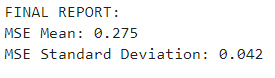

#### *Optional - Data Visualization*

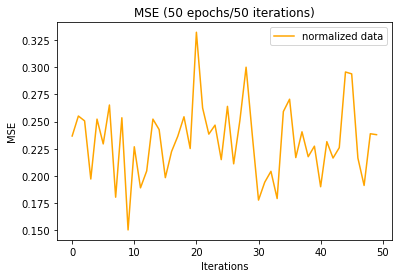

In [16]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

plt.plot(Dlist, label= 'normalized data', color='orange')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.title('MSE (50 epochs/50 iterations)')
plt.legend(loc = 'best')
pyplot.savefig('fig-msePartD.png')

Part B shown for reference;  
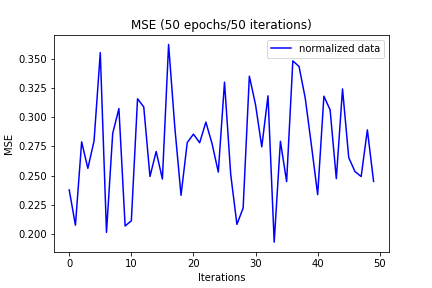

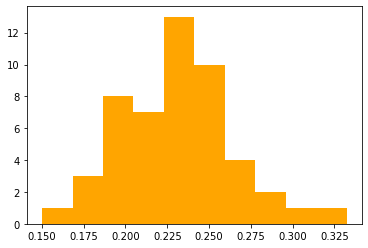

In [17]:
pyplot.hist(result, color='orange')
pyplot.savefig('fig-msePartDhist.png')

Part B Histogram shown below for reference:  
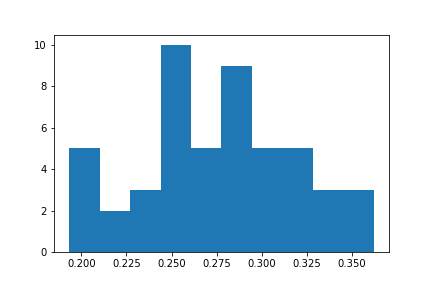